In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def residual_block(x, units):
    shortcut = x
    if x.shape[-1] != units:
        shortcut = Dense(units, kernel_regularizer=regularizers.l2(0.001))(shortcut)
    x = Dense(units, kernel_regularizer=regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.3)(x)  # Reduced dropout
    x = Dense(units, kernel_regularizer=regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)  # Reduced dropout
    x = Add()([x, shortcut])
    x = Activation("relu")(x)
    return x

def create_resnet_dnn():
    inputs = Input(shape=(784,))
    x = BatchNormalization()(inputs)
    x = Dense(1024, kernel_regularizer=regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = residual_block(x, 512)
    x = Dense(256, kernel_regularizer=regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.3)(x)  # Reduced dropout
    x = residual_block(x, 256)
    x = Dense(128, kernel_regularizer=regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = residual_block(x, 128)
    x = Dropout(0.2)(x)  # Reduced dropout
    outputs = Dense(10, activation="softmax")(x)
    return Model(inputs, outputs)


In [23]:
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

In [24]:
resnet_model = create_resnet_dnn()
resnet_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
resnet_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 784)       │      3,136 │ input_layer_11[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_75 (Dense)    │ (None, 1024)      │    803,840 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024)      │      4,096 │ dense_75[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_81       │ (None, 1024)      │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_77 (Dense)    │ (None, 512)       │    524,800 │ activation_81[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_77[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_82       │ (None, 512)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_55          │ (None, 512)       │          0 │ activation_82[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_78 (Dense)    │ (None, 512)       │    262,656 │ dropout_55[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_78[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_56          │ (None, 512)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_76 (Dense)    │ (None, 512)       │    524,800 │ activation_81[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_31 (Add)        │ (None, 512)       │          0 │ dropout_56[0][0], │
│                     │                   │            │ dense_76[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_83       │ (None, 512)       │          0 │ add_31[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_79 (Dense)    │ (None, 256)       │    131,328 │ activation_83[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_79[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_84       │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 2,462,154 (9.39 MB)

 Trainable params: 2,454,186 (9.36 MB)

 Non-trainable params: 7,968 (31.12 KB)

In [25]:
history = resnet_model.fit(
    x_train_flat, y_train,
    validation_split=0.2,
    epochs=30,  # Increased epochs
    batch_size=128,
    verbose=2,
    callbacks=[early_stop, lr_scheduler]  # Added callbacks
)

Epoch 1/30
375/375 - 20s - 53ms/step - accuracy: 0.7709 - loss: 3.8663 - val_accuracy: 0.8097 - val_loss: 2.6998 - learning_rate: 1.0000e-03
Epoch 2/30
375/375 - 3s - 8ms/step - accuracy: 0.8415 - loss: 1.9118 - val_accuracy: 0.8433 - val_loss: 1.3945 - learning_rate: 1.0000e-03
Epoch 3/30
375/375 - 5s - 12ms/step - accuracy: 0.8483 - loss: 1.1052 - val_accuracy: 0.8543 - val_loss: 0.8879 - learning_rate: 1.0000e-03
Epoch 4/30
375/375 - 2s - 6ms/step - accuracy: 0.8490 - loss: 0.8124 - val_accuracy: 0.8552 - val_loss: 0.7100 - learning_rate: 1.0000e-03
Epoch 5/30
375/375 - 3s - 7ms/step - accuracy: 0.8502 - loss: 0.6972 - val_accuracy: 0.8456 - val_loss: 0.6711 - learning_rate: 1.0000e-03
Epoch 6/30
375/375 - 3s - 8ms/step - accuracy: 0.8525 - loss: 0.6427 - val_accuracy: 0.8322 - val_loss: 0.7009 - learning_rate: 1.0000e-03
Epoch 7/30

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
375/375 - 5s - 13ms/step - accuracy: 0.8548 - loss: 0.6170 - val_accuracy: 

In [26]:
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")


ResNet-style DNN Test Accuracy: 0.8775


In [27]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.legend()
    plt.show()

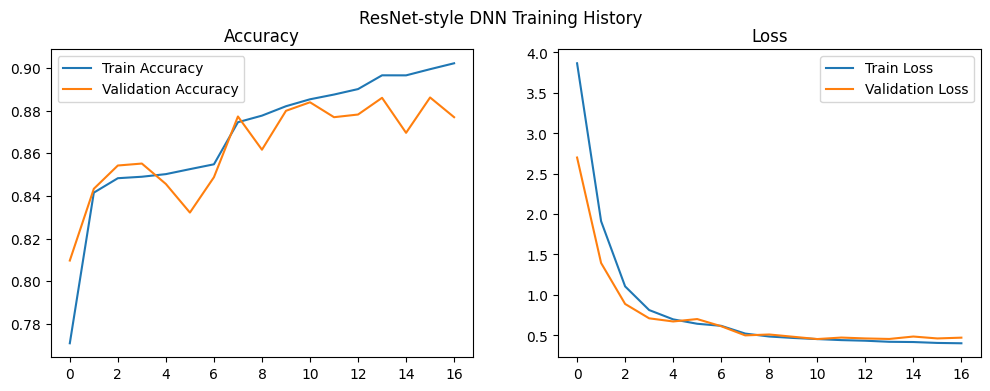

In [28]:
plot_history(history, "ResNet-style DNN Training History")

In [29]:
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3 * num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = y_test[i]
        color = "green" if pred_label == true_label else "red"
        plt.xlabel(
            f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})",
            color=color,
        )
    plt.show()


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


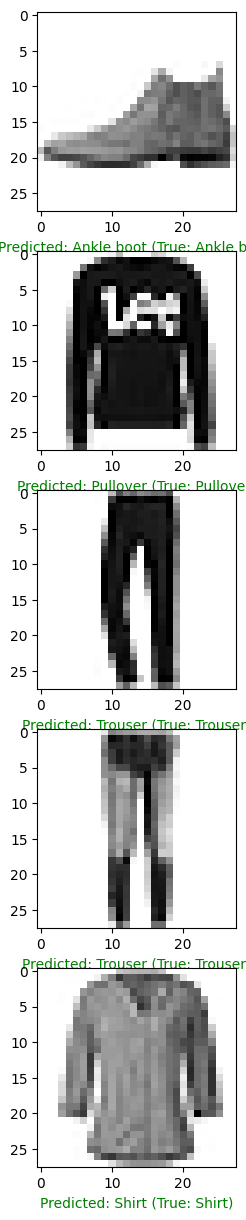

In [30]:
print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)